# Perturbation Exercise 2

** Question:**

Consider the following static general equlibrim model.  Firms have a demand for labor curve given by $n^d = \left[\frac{(1-\alpha)z}{w}\right]^{\tfrac{1}{\alpha}} k$, where $z$ is the level of technology, $w$ is the wage rate, $k$ is a fixed capital stock, and $\alpha$ is a capital share parameter from a Cobb-Douglas production function.  Given this, the profits earned by the firm are $\pi = zk^\alpha (n^d)^{1-\alpha} - w n^d$.  The supply of labor by households is $n^s = h - \frac{b}{w(1+b)}(wh+\pi-t)$, where $h$ is the time endowment of the household, is $t$ is a lump-sum tax, and $b$ is a weight in utility on leisure versus consumption of goods.  Assuming a unit measure of both households and firms, use the following parameter values $\alpha = .33$, $k=5$, $z=1$, $b=2$, $t=.1$ and $h=24$.

Find the market-clearing wage rate using $\texttt{fsolve}$.  Find a first-order approxmation for wage as a function of $k$.  Approximate about $k=5$.  

Find a second-order approximation also about $k=5$.

Set up a grid on the space between $k=1$ and $k=15$. Use $\texttt{fsolve}$ to find the equilibrium value of the wage at each point on the grid.

Plot the grid solution, the linear and quadratic approximations on the same graph.

** Answer:**

Let's code the excess demand function.  This will implicitly define the wage a function of the capital stock when set excess demand to zer0.

Next, we need code that generates second derivatives numerically.  The following code generates second and third derivatives.

Write the main program

w0:  [0.62736178]
check:  [0.]
[0.04154998] [-0.00557955] [-0.00148512]
[-39.01934826] [1.62125302] [251.16231558] [-7.83775508] [0.] [-2019.75664471] [50.4376543] [-5.55111512e-10] [2.22044605e-09]


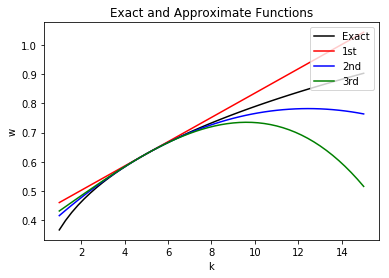

In [2]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# choose approximation point
k0 = 5.

# set value for epsilon
eps = .01
α=0.33
h = 24.
t = .1
b = 2.
z= 1.

# create excess demand function
def excess(w,k):
    nd = (((1-α)*z)/w)**(1/α)*k
    pr = z*k**α*(nd)**(1-α) - w*nd
    ns = h - (b/(w*(1+b))) * (w*h + pr  - t)
    return nd - ns

#  create anonymous function
f = lambda w: excess(w, k0)

#  use fsolve to find equlibrium wage
w0 = opt.fsolve(f, .1)
print ('w0: ', w0)

#  check solution
check = excess(w0, k0)
print ('check: ', check)


# Write the function that gets you the 1st, 2nd and 3rd derivative
# See section 5.1 bivariate numerical derivatives
# expressions for fxxx, fyyy, fxxy, fxyy are corrected for typos.
def BivariateNumericalDiff(f, x0, y0, eps):
    #Define the points
    fK = f(x0, y0)
    fL = f(x0+eps, y0)
    fJ = f(x0-eps, y0)
    fF = f(x0, y0+eps)
    fQ = f(x0, y0-eps)
    fE = f(x0-eps, y0+eps)
    fG = f(x0+eps, y0+eps)
    fP = f(x0-eps, y0-eps)
    fR = f(x0+eps, y0-eps)
    fA = f(x0-eps, y0+2*eps)
    fB = f(x0, y0+2*eps)
    fC = f(x0+eps, y0+2*eps)
    fD = f(x0-2*eps, y0+eps)
    fH = f(x0+2*eps, y0+eps)
    fI = f(x0-2*eps, y0)
    fM = f(x0+2*eps, y0)
    fN = f(x0-2*eps, y0-eps)
    fS = f(x0+2*eps, y0-eps)
    fT = f(x0-eps, y0-2*eps)
    fV = f(x0+eps, y0-2*eps)
    fU = f(x0, y0-2*eps)
    
    fx = (fL - fJ)/(2*eps)
    fy = (fF - fQ)/(2*eps)
    fxx = (fL - 2*fK + fJ)/(eps**2)
    fyy = (fF - 2*fK + fQ)/(eps**2)
    fxy = (fG - fE - fR + fP)/(4*eps**2)
    fxxx = (fM - 2*fL+2*fJ-fI)/(2*eps**3)
    fxxy = (fH - 2*fF - fS + fD + 2*fQ -fN)/(8*eps**3)
    fxyy = (fA - 2*fJ-fC+fT+2*fL-fV)/(8*eps**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*eps**3)
    return fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy

Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = BivariateNumericalDiff(excess, w0, k0, eps)
    
# get coefficients using perturbation formulas
w1 = - Fk/Fw
w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
w3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw

print(w1, w2, w3)
print(Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk)
# set up a grid
min = 1
max = 15
nstep = 50
kgrid = np.linspace(min, max, num=nstep)
wgrid = np.zeros(nstep)
w1grid = np.zeros(nstep)
w2grid = np.zeros(nstep)
w3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda w: excess(w, kgrid[i])
    # use fsolve to find equilibrium wage
    wgrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    w1grid[i] = w0 + w1*(kgrid[i] - k0)
    w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
    w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

# plot results
plt.plot(kgrid, wgrid, 'k-',
         kgrid, w1grid, 'r-',
         kgrid, w2grid, 'b-',
         kgrid, w3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions')
plt.xlabel('k')
plt.ylabel('w')
plt.show()

#### Exercise 3: Cubic approximation

y0:  [1.87444787]
check:  [0.]
[-0.00090084] [0.00290141] [-0.00041229]
[3.96771771e-07] [3.57428631e-10] [-1.50339813e-08] [-1.36839538e-08] [1.1894799e-11] [2.45401022e-08] [4.07540585e-10] [-6.08148057e-10] [-2.74015158e-12]


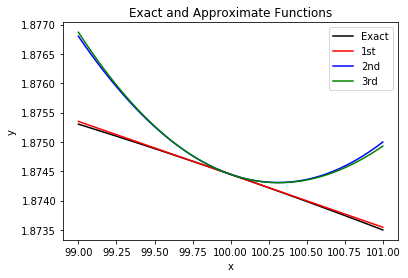

In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# choose approximation point
x0 = 100



# create excess function
def excess(y,x):
    lhs = (x**(0.35) + 0.9*x - y)**(-2.5)
    rhs =  0.95*(y**(0.35) + 0.9*x)**(-2.5)
    return lhs - rhs

#  create anonymous function
f = lambda y: excess(y,x0)

#  use fsolve to find equlibrium wage
y0 = opt.fsolve(f, .1)
print ('y0: ', y0)

#  check solution
check = excess(y0,x0)
print ('check: ', check)


# Write the function that gets you the 1st, 2nd and 3rd derivative
# See section 5.1 bivariate numerical derivatives
# expressions for fxxx, fyyy, fxxy, fxyy are corrected for typos.
def BivariateNumericalDiff(f, x0, y0, eps):
    #Define the points
    fK = f(x0, y0)
    fL = f(x0+eps, y0)
    fJ = f(x0-eps, y0)
    fF = f(x0, y0+eps)
    fQ = f(x0, y0-eps)
    fE = f(x0-eps, y0+eps)
    fG = f(x0+eps, y0+eps)
    fP = f(x0-eps, y0-eps)
    fR = f(x0+eps, y0-eps)
    fA = f(x0-eps, y0+2*eps)
    fB = f(x0, y0+2*eps)
    fC = f(x0+eps, y0+2*eps)
    fD = f(x0-2*eps, y0+eps)
    fH = f(x0+2*eps, y0+eps)
    fI = f(x0-2*eps, y0)
    fM = f(x0+2*eps, y0)
    fN = f(x0-2*eps, y0-eps)
    fS = f(x0+2*eps, y0-eps)
    fT = f(x0-eps, y0-2*eps)
    fV = f(x0+eps, y0-2*eps)
    fU = f(x0, y0-2*eps)
    
    fx = (fL - fJ)/(2*eps)
    fy = (fF - fQ)/(2*eps)
    fxx = (fL - 2*fK + fJ)/(eps**2)
    fyy = (fF - 2*fK + fQ)/(eps**2)
    fxy = (fG - fE - fR + fP)/(4*eps**2)
    fxxx = (fM - 2*fL+2*fJ-fI)/(2*eps**3)
    fxxy = (fH - 2*fF - fS + fD + 2*fQ -fN)/(8*eps**3)
    fxyy = (fA - 2*fJ-fC+fT+2*fL-fV)/(8*eps**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*eps**3)
    return fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy

Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = BivariateNumericalDiff(excess, y0, x0, eps)
    
# get coefficients using perturbation formulas
y1 = - Fk/Fw
y2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
y3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw

print(y1, y2, y3)
print(Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk)
# set up a grid
min = 99
max = 101
nstep = 50
xgrid = np.linspace(min, max, num=nstep)
ygrid = np.zeros(nstep)
y1grid = np.zeros(nstep)
y2grid = np.zeros(nstep)
y3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda y: excess(y, xgrid[i])
    # use fsolve to find equilibrium wage
    ygrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    y1grid[i] = y0 + y1*(xgrid[i] - x0)
    y2grid[i] = y1grid[i] + .5*y2*(xgrid[i] - x0)**2
    y3grid[i] = y2grid[i] + (1/6)*y3*(xgrid[i]-x0)**3

# plot results
plt.plot(xgrid, ygrid, 'k-',
         xgrid, y1grid, 'r-',
         xgrid, y2grid, 'b-',
         xgrid, y3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

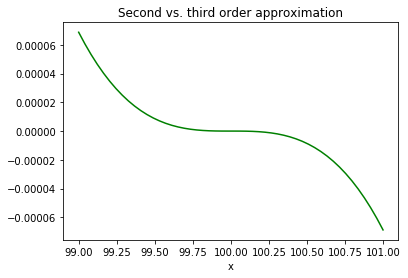

In [5]:
# plot results
plt.plot(xgrid, y3grid- y2grid, 'g-')
plt.title('Second vs. third order approximation')
plt.xlabel('x')
plt.show()

#### Exercise 4: Back to Brock Mirman

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# choose approximation point
α = 0.4
β = 



# create excess function
def excess(y,x):
    lhs = (x**(0.35) + 0.9*x - y)**(-2.5)
    rhs =  0.95*(y**(0.35) + 0.9*x)**(-2.5)
    return lhs - rhs

#  create anonymous function
f = lambda y: excess(y,x0)

#  use fsolve to find equlibrium wage
y0 = opt.fsolve(f, .1)
print ('y0: ', y0)

#  check solution
check = excess(y0,x0)
print ('check: ', check)


# Write the function that gets you the 1st, 2nd and 3rd derivative
# See section 5.1 bivariate numerical derivatives
# expressions for fxxx, fyyy, fxxy, fxyy are corrected for typos.
def BivariateNumericalDiff(f, x0, y0, eps):
    #Define the points
    fK = f(x0, y0)
    fL = f(x0+eps, y0)
    fJ = f(x0-eps, y0)
    fF = f(x0, y0+eps)
    fQ = f(x0, y0-eps)
    fE = f(x0-eps, y0+eps)
    fG = f(x0+eps, y0+eps)
    fP = f(x0-eps, y0-eps)
    fR = f(x0+eps, y0-eps)
    fA = f(x0-eps, y0+2*eps)
    fB = f(x0, y0+2*eps)
    fC = f(x0+eps, y0+2*eps)
    fD = f(x0-2*eps, y0+eps)
    fH = f(x0+2*eps, y0+eps)
    fI = f(x0-2*eps, y0)
    fM = f(x0+2*eps, y0)
    fN = f(x0-2*eps, y0-eps)
    fS = f(x0+2*eps, y0-eps)
    fT = f(x0-eps, y0-2*eps)
    fV = f(x0+eps, y0-2*eps)
    fU = f(x0, y0-2*eps)
    
    fx = (fL - fJ)/(2*eps)
    fy = (fF - fQ)/(2*eps)
    fxx = (fL - 2*fK + fJ)/(eps**2)
    fyy = (fF - 2*fK + fQ)/(eps**2)
    fxy = (fG - fE - fR + fP)/(4*eps**2)
    fxxx = (fM - 2*fL+2*fJ-fI)/(2*eps**3)
    fxxy = (fH - 2*fF - fS + fD + 2*fQ -fN)/(8*eps**3)
    fxyy = (fA - 2*fJ-fC+fT+2*fL-fV)/(8*eps**3)
    fyyy = (fB-2*fF+2*fQ-fU)/(2*eps**3)
    return fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy

Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = BivariateNumericalDiff(excess, y0, x0, eps)
    
# get coefficients using perturbation formulas
y1 = - Fk/Fw
y2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
y3 = -(Fwww*w1**3 + 3*Fww*w2*w1 + 2*Fkw*w2 + 2*Fkww*w1**2 + Fkkk) / Fw

print(y1, y2, y3)
print(Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk)
# set up a grid
min = 99
max = 101
nstep = 50
xgrid = np.linspace(min, max, num=nstep)
ygrid = np.zeros(nstep)
y1grid = np.zeros(nstep)
y2grid = np.zeros(nstep)
y3grid = np.zeros(nstep)

#  get solutions at each point on the grid
for i in range(0, nstep):
    # find exact solutions
    # create anonymous function
    f = lambda y: excess(y, xgrid[i])
    # use fsolve to find equilibrium wage
    ygrid[i] = opt.fsolve(f, .1)
    # evaluate approximations 
    y1grid[i] = y0 + y1*(xgrid[i] - x0)
    y2grid[i] = y1grid[i] + .5*y2*(xgrid[i] - x0)**2
    y3grid[i] = y2grid[i] + (1/6)*y3*(xgrid[i]-x0)**3

# plot results
plt.plot(xgrid, ygrid, 'k-',
         xgrid, y1grid, 'r-',
         xgrid, y2grid, 'b-',
         xgrid, y3grid, 'g-')
plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
plt.title('Exact and Approximate Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()